## Решение домашнего задания к уроку 4. Сверточные нейронные сети

### Задание:
#### Используя файл Web4.ipynb (он в полезных ссылках):

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

2. оценить рост точности при увеличении ширины сети (больше фильтров)

3. оценить рост точности при увеличении глубины сети (больше слоев)

4. *  сравнить с точностью полносвязной сети для этой выборки

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [2]:
tf.random.set_seed(1)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [5]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 13s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [6]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

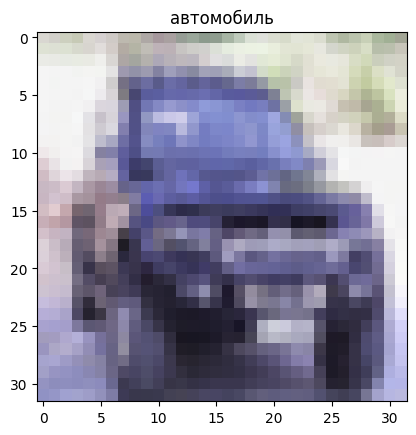

In [7]:
N = 9

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

### 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10


In [8]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [9]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 19s 10ms/step - loss: 1.9523 - accuracy: 0.2397 - val_loss: 1.7242 - val_accuracy: 0.3368
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.7194 - accuracy: 0.3298 - val_loss: 1.5369 - val_accuracy: 0.4107
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6187 - accuracy: 0.3789 - val_loss: 1.4577 - val_accuracy: 0.4509
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5487 - accuracy: 0.4125 - val_loss: 1.4043 - val_accuracy: 0.4665
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4885 - accuracy: 0.4430 - val_loss: 1.2930 - val_accuracy: 0.5311
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 1.4345 - accuracy: 0.4702 - val_loss: 1.2571 - val_accuracy: 0.5318
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 1.3809 - accuracy: 0.4970 - val_loss: 1.1962 - val_accuracy: 0.5704
Ep

In [10]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 5s - loss: 1.1026 - accuracy: 0.6088 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 1.1447 - accuracy: 0.5978 - 844ms/epoch - 3ms/step
train_loss: 1.102623462677002, train_accuracy: 0.6087599992752075
test_loss: 1.1447497606277466, test_accuracy: 0.5978000164031982


1/1 [==============================] - 0s 247ms/step


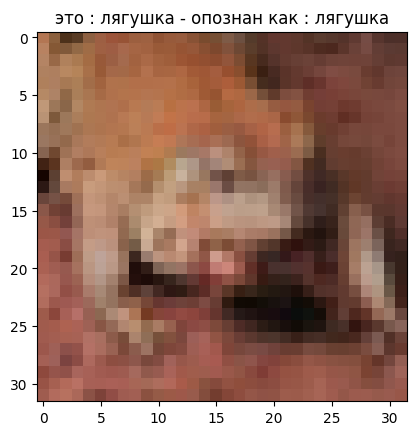

In [11]:
N = 5
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 2. Оценить рост точности при увеличении ширины сети (больше фильтров)

In [12]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [13]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 15s 16ms/step - loss: 1.9755 - accuracy: 0.2346 - val_loss: 1.6820 - val_accuracy: 0.3524
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.6941 - accuracy: 0.3449 - val_loss: 1.5044 - val_accuracy: 0.4317
Epoch 3/10
782/782 [==============================] - 11s 15ms/step - loss: 1.5056 - accuracy: 0.4387 - val_loss: 1.3045 - val_accuracy: 0.5077
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 1.3845 - accuracy: 0.4958 - val_loss: 1.2860 - val_accuracy: 0.5342
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.3002 - accuracy: 0.5314 - val_loss: 1.1092 - val_accuracy: 0.6030
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 1.2239 - accuracy: 0.5620 - val_loss: 1.0351 - val_accuracy: 0.6303
Epoch 7/10
782/782 [==============================] - 12s 16ms/step - loss: 1.1598 - accuracy: 0.5891 - val_loss: 0.9858 - val_accuracy:

In [14]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 5s - loss: 0.7757 - accuracy: 0.7206 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.8608 - accuracy: 0.6977 - 954ms/epoch - 3ms/step
train_loss: 0.7756822109222412, train_accuracy: 0.7205600142478943
test_loss: 0.8608198165893555, test_accuracy: 0.697700023651123


1/1 [==============================] - 0s 157ms/step


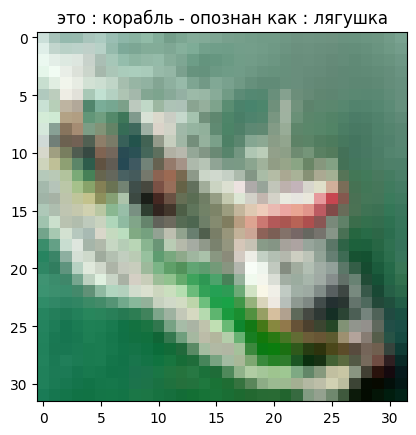

In [15]:
N = 15
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 3. Оценить рост точности при увеличении глубины сети (больше слоев)

In [16]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [17]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 12s 10ms/step - loss: 2.0322 - accuracy: 0.2074 - val_loss: 1.7713 - val_accuracy: 0.3492
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.6804 - accuracy: 0.3716 - val_loss: 1.4104 - val_accuracy: 0.4807
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5063 - accuracy: 0.4530 - val_loss: 1.2587 - val_accuracy: 0.5363
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 1.3771 - accuracy: 0.5107 - val_loss: 1.1580 - val_accuracy: 0.5780
Epoch 5/10
782/782 [==============================] - 7s 10ms/step - loss: 1.2715 - accuracy: 0.5549 - val_loss: 1.0934 - val_accuracy: 0.6142
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1934 - accuracy: 0.5867 - val_loss: 1.0270 - val_accuracy: 0.6383
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 1.1404 - accuracy: 0.6084 - val_loss: 0.9710 - val_accuracy: 0.6595


In [18]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 4s - loss: 0.7526 - accuracy: 0.7325 - 4s/epoch - 3ms/step
313/313 - 1s - loss: 0.8471 - accuracy: 0.7072 - 875ms/epoch - 3ms/step
train_loss: 0.7525957822799683, train_accuracy: 0.732479989528656
test_loss: 0.8470882773399353, test_accuracy: 0.7071999907493591


1/1 [==============================] - 0s 211ms/step


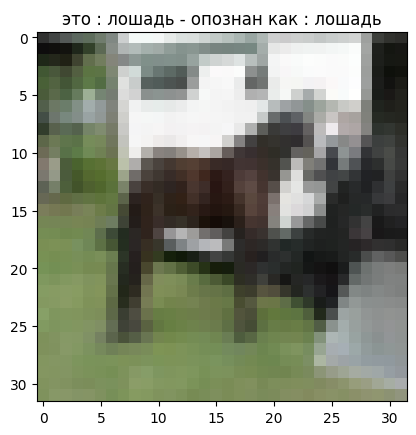

In [19]:
N = 20
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 4. Полносвязная сеть для этой выборки

In [20]:
# конфигурирование слоев нейросети
model_4 = Sequential()

# полносвязные слои нейронной сети
model_4.add(Flatten(input_shape=X_train.shape[1:]))
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dense(256))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()
# компиляция модели
model_4.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 activation_23 (Activation)  (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [21]:
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 2.0012 - accuracy: 0.2735 - val_loss: 1.7885 - val_accuracy: 0.3623
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7890 - accuracy: 0.3588 - val_loss: 1.6716 - val_accuracy: 0.4024
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7161 - accuracy: 0.3847 - val_loss: 1.6598 - val_accuracy: 0.4006
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6585 - accuracy: 0.4039 - val_loss: 1.6040 - val_accuracy: 0.4215
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6269 - accuracy: 0.4186 - val_loss: 1.5664 - val_accuracy: 0.4440
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5993 - accuracy: 0.4294 - val_loss: 1.5539 - val_accuracy: 0.4429
Epoch 7/10
782/782 [==============================] - 4s 4ms/step - loss: 1.5793 - accuracy: 0.4374 - val_loss: 1.5196 - val_accuracy: 0.4592
Epoch 

In [22]:
train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(4)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 3s - loss: 1.4598 - accuracy: 0.4725 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 1.5202 - accuracy: 0.4561 - 636ms/epoch - 2ms/step
train_loss: 1.459792137145996, train_accuracy: 0.47247999906539917
test_loss: 1.5202207565307617, test_accuracy: 0.4560999870300293


1/1 [==============================] - 0s 56ms/step


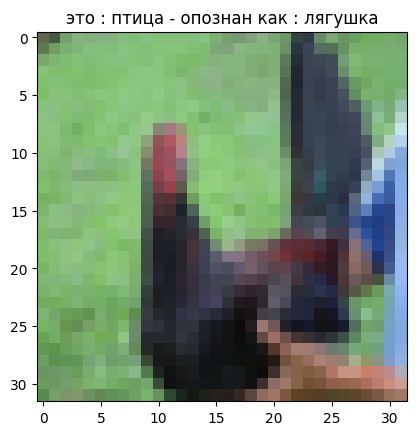

In [23]:
N = 25
y_p = model_4.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [24]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc

In [25]:
results

,step,desc,train_acc,test_acc
0,1,Базовая модель,0.61,0.60
1,2,Шире - больше каналов,0.72,0.70
2,3,Глубже - больше слоев,0.73,0.71
3,4,Полносвязная сеть,0.47,0.46


### Выводы:<br>
* увеличение количества каналов, т.е. увеличение итогового количества признаков, увеличило значение метрики;
* увеличение глубины сети тоже увеличило метрику качества, но это всё равно ниже, чем с большом кол-вом каналов;
* полносвязная сеть без сверточных слоев показывает качество ниже, чем базовая модель со сверточными слоями.